In [241]:
import speech_recognition as sr
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [243]:
# Set the path to your folder containing sign language images
SIGN_LANGUAGE_IMAGES_PATH = r"C:\Users\nayan\Desktop\python progrmas\signs_asl"  # Modify this with the correct path


In [245]:

# Mapping text to sign language images
def text_to_sign(text):
    image_paths = []
    
    # Assuming you have images named A.png, B.png, etc. for each letter
    for letter in text:
        if letter.isalpha():  # Only process alphabetic characters
            image_file = f"{letter.upper()}.png"  # Assuming images are named A.png, B.png, etc.
            image_path = os.path.join(SIGN_LANGUAGE_IMAGES_PATH, image_file)
            
            if os.path.exists(image_path):
                image_paths.append(image_path)
            else:
                print(f"Image not found for {letter.upper()}")  # Handle missing images
                
    return image_paths


In [247]:
# Function to display the sign language images
def display_sign_images(image_paths):
    for image_path in image_paths:
        img = mpimg.imread(image_path)
        imgplot = plt.imshow(img)
        plt.axis('off')  # Hide axes
        plt.show()

In [249]:
# Function to convert speech to text
def speech_to_text():
    recognizer = sr.Recognizer()
    
    with sr.Microphone() as source:
        print("Please speak something...")
        recognizer.adjust_for_ambient_noise(source)  # Reduce background noise
        audio = recognizer.listen(source)
        
    try:
        # Recognizing the speech and converting to text
        text = recognizer.recognize_google(audio)
        print(f"You said: {text}")
        return text
    except sr.UnknownValueError:
        print("Sorry, I could not understand the audio")
    except sr.RequestError as e:
        print(f"Could not request results from Google Speech Recognition service; {e}")
    return None


Please speak something...
You said: welcome


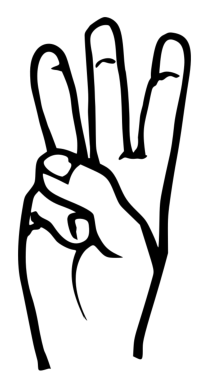

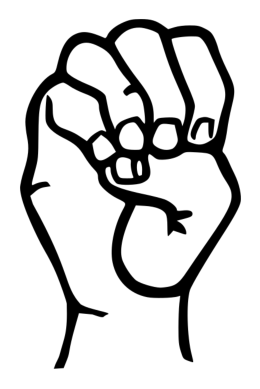

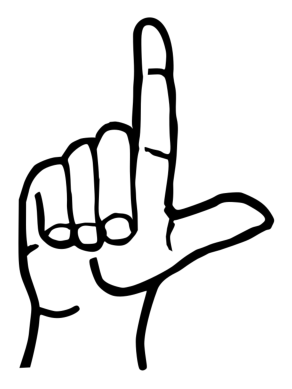

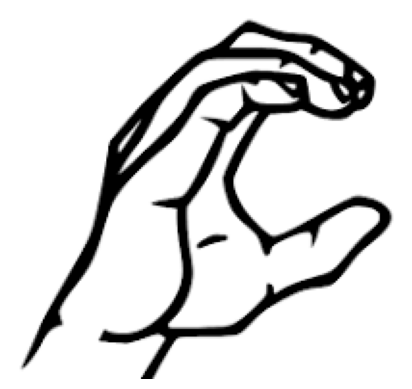

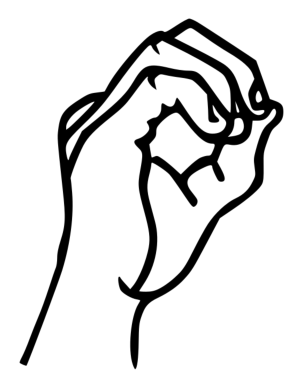

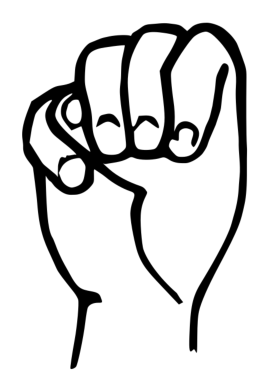

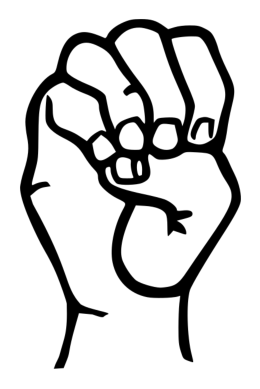

In [283]:
# Main function to run the entire process
def main():
    # Convert speech to text
    text = speech_to_text()
    
    if text:
        # Convert text to sign language gestures (images)
        image_paths = text_to_sign(text)
        
        if image_paths:
            # Display the sign language images
            display_sign_images(image_paths)

# Run the main function
if __name__ == "__main__":
    main()